In [2]:
import pickle

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/UKB/'

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))

print(demo.keys())

dict_keys(['f_22001_0_0', 'f_21003_3_0', 'f_21003_2_0', 'f_21000_0_0', 'CaAfCarDiff', 'CaIndDiff', 'CaChiDiff', 'f_21000_0_0_comb', 'longitudinal', '22438-0.0', '22828-0.0', '26201-0.0', '26202-0.0', '26203-0.0', '26204-0.0', '26205-0.0', '26206-0.0', '26207-0.0', '26208-0.0', '26209-0.0', '26210-0.0', '26211-0.0', '26212-0.0', '26213-0.0', '26214-0.0', '26215-0.0', '26216-0.0', '26217-0.0', '26218-0.0', '26219-0.0', '26220-0.0', '26221-0.0', '26222-0.0', '26223-0.0', '26224-0.0', '26225-0.0', '26226-0.0', '26227-0.0', '26228-0.0', '26229-0.0', '26231-0.0', '26232-0.0', '26233-0.0', '26234-0.0', '26235-0.0', '26236-0.0', '26237-0.0', '26238-0.0', '26239-0.0', '26240-0.0', '26241-0.0', '26242-0.0', '26243-0.0', '26244-0.0', '26245-0.0', '26246-0.0', '26247-0.0', '26248-0.0', '26249-0.0', '26250-0.0', '26251-0.0', '26252-0.0', '26253-0.0', '26254-0.0', '26255-0.0', '26256-0.0', '26257-0.0', '26258-0.0', '26259-0.0', '26260-0.0', '26261-0.0', '26262-0.0', '26263-0.0', '26264-0.0', '26265-

In [3]:
import numpy as np

diff = []

for sub in demo['longitudinal']:
    pd = np.load(f'{demodir}/fc/{sub}_task-20227-3-2-diff_fc.npy')
    diff.append(pd)

diff = np.stack(diff)

print(diff.shape)

(2722, 34716)


In [4]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


/tmp/ipykernel_33437/2522401490.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


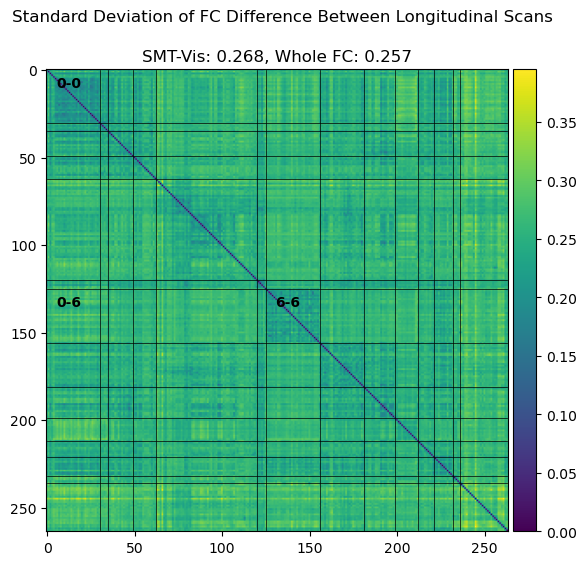

In [31]:
# Variance

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

std = np.std(diff, axis=0)

fig,ax = plt.subplots(figsize=(7,6))

im = ax.imshow(remap(vec2mat(std)))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

bounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]

for a in bounds[1:-1]:
    ax.plot([a,a],[0,263], color='black', linewidth=0.5)
    ax.plot([0,263],[a,a], color='black', linewidth=0.5)
    
ax.text(5,135,'0-6',fontweight='bold',color='black')
ax.text(5,10,'0-0',fontweight='bold',color='black')
ax.text(130,135,'6-6',fontweight='bold',color='black')

fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('SMT-Vis: 0.268, Whole FC: 0.257')

fig.suptitle('Standard Deviation of FC Difference Between Longitudinal Scans')
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/long_fig6.pdf')
fig.show()

In [33]:
bounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]

def get_net_avg(bounds, net1, net2, diff):
    res = []
    
    s1 = np.arange(bounds[net1], bounds[net1+1])
    s2 = np.arange(bounds[net2], bounds[net2+1])

    for i,v in enumerate(diff):
        m = remap(vec2mat(v))
        c = m[np.ix_(s1,s2)].flatten()
        c = np.mean(c, keepdims=True)
        res.append(c)

    res = np.concatenate(res)
    
    return res

avg = get_net_avg(bounds, 6, 6, np.std(diff, axis=0, keepdims=True))
print(avg)

print(np.mean(np.std(diff, axis=0, keepdims=True)))

[0.2204788]
0.25730147727139213


In [37]:
import re

smt = []
vis = []

with open('/home/anton/Documents/Tulane/Hackathon/power264/power264CoorMNI.sclib', 'r') as f:
    for line in f:
        res = re.match('#Power\d+([^#]+)#([-0-9]+),([-0-9]+),([-0-9]+)#.*', line)
        if not res:
            continue
        mni = (int(res.group(2)), int(res.group(3)), int(res.group(4)))
        if res.group(1) == 'somatomotorHand' or res.group(1) == 'somatomotorMouth':
            smt.append(mni)
        elif res.group(1) == 'visual':
            vis.append(mni)

print(smt)
print(vis)

[(-7, -52, 61), (-14, -18, 40), (0, -15, 47), (10, -2, 45), (-7, -21, 65), (-7, -33, 72), (13, -33, 75), (-54, -23, 43), (29, -17, 71), (10, -46, 73), (-23, -30, 72), (-40, -19, 54), (29, -39, 59), (50, -20, 42), (-38, -27, 69), (20, -29, 60), (44, -8, 57), (-29, -43, 61), (10, -17, 74), (22, -42, 69), (-45, -32, 47), (-21, -31, 61), (-13, -17, 75), (42, -20, 55), (-38, -15, 69), (-16, -46, 73), (2, -28, 60), (3, -17, 58), (38, -17, 45), (-49, -11, 35), (36, -9, 14), (51, -6, 32), (-53, -10, 24), (66, -8, 25), (47, -30, 49)]
[(18, -47, -10), (40, -72, 14), (8, -72, 11), (-8, -81, 7), (-28, -79, 19), (20, -66, 2), (-24, -91, 19), (27, -59, -9), (-15, -72, -8), (-18, -68, 5), (43, -78, -12), (-47, -76, -10), (-14, -91, 31), (15, -87, 37), (29, -77, 25), (20, -86, -2), (15, -77, 31), (-16, -52, -1), (42, -66, -8), (24, -87, 24), (6, -72, 24), (-42, -74, 0), (26, -79, -16), (-16, -77, 34), (-3, -81, 21), (-40, -88, -6), (37, -84, 13), (6, -81, 6), (-26, -90, 3), (-33, -79, -13), (37, -81, 

/tmp/ipykernel_33437/602883095.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


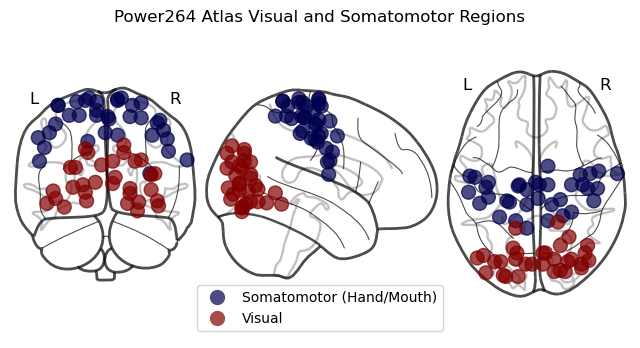

In [55]:
import nilearn.plotting as niplt
import matplotlib.lines as mlines

blue = mlines.Line2D([], [], color='#4c4c82', marker='o', linestyle='None',
                          markersize=10, label='Somatomotor (Hand/Mouth)')
red = mlines.Line2D([], [], color='#a64c4c', marker='o', linestyle='None',
                          markersize=10, label='Visual')

fig, ax = plt.subplots(figsize=(8,4))
cm = plt.get_cmap('seismic')
niplt.plot_markers(len(smt)*[1]+len(vis)*[2], smt+vis, node_cmap=cm, axes=ax, colorbar=False)

ax.legend(loc='lower center', handles=[blue, red])

ax.set_title('Power264 Atlas Visual and Somatomotor Regions')

fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/long_fig7.pdf')

In [76]:
from scipy.stats import ttest_1samp

ps = []

for a in range(14):
    for b in range(a,14):
        avg = get_net_avg(bounds, a, b, diff)
        res = ttest_1samp(avg, 0)
        p = np.log10(res.pvalue*105)
        if p > 1:
            p = 1
        ps.append(p)
        print(a,b,p)

0 0 -3.155337686458214
0 1 1
0 2 -9.077414649308247
0 3 -2.6247076131741234
0 4 0.8910089266656358
0 5 -4.001329832030462
0 6 -16.04746225801422
0 7 -2.2639819786905178
0 8 -8.21951944971532
0 9 -4.804357819587938
0 10 1
0 11 1
0 12 1
0 13 1
1 1 -0.2801184755094909
1 2 -4.065808559505228
1 3 -0.89755930577665
1 4 1
1 5 -0.47720515364981403
1 6 -15.845185289612768
1 7 0.21112057848069207
1 8 -2.450568286461621
1 9 -6.523470425401563
1 10 1
1 11 -0.35004601244920985
1 12 1
1 13 0.47935167010909885
2 2 -9.504033127239516
2 3 -7.168679096233169
2 4 1
2 5 -0.5663941003320445
2 6 0.6346190141520941
2 7 0.4922862657668819
2 8 -4.403490435012465
2 9 -3.893209845630382
2 10 1
2 11 0.5054222237856724
2 12 1
2 13 1
3 3 -4.611753457282536
3 4 1
3 5 -1.4428652186713102
3 6 -2.351084666649507
3 7 -0.4236215438222711
3 8 -4.909508942176559
3 9 -4.5440412613587
3 10 0.5558137835068055
3 11 1
3 12 1
3 13 0.7370480518413084
4 4 1
4 5 0.9774199531435321
4 6 -2.708763788118848
4 7 0.8570943565663958
4 8 1

/tmp/ipykernel_33437/4280231449.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


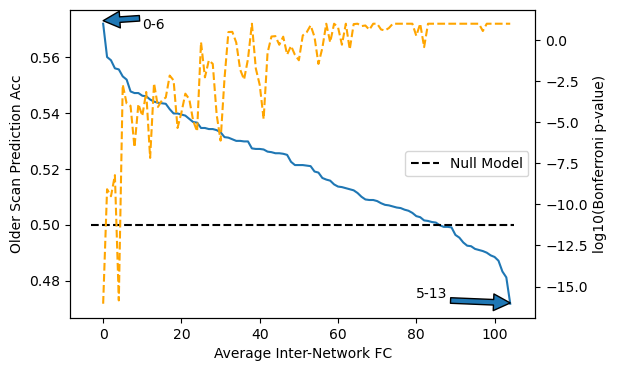

In [77]:
# Read networks file

import numpy as np
import matplotlib.pyplot as plt

fname = '/home/anton/Documents/Tulane/Research/Work/UKB/long_networks_avg.csv'

ps = np.array(ps)
data = np.genfromtxt(fname, delimiter=' ')
idcs = np.argsort(data[:,2])[::-1]

fig,ax = plt.subplots(1,1,figsize=(6,4))

ax2 = ax.twinx()
ax2.plot(ps[idcs], color='orange', linestyle='--')
ax2.set_ylabel('log10(Bonferroni p-value)')

ax.plot(data[idcs,2])
ax.plot([-3,105],[0.5,0.5],label='Null Model',linestyle='--',color='black')
# ax.set_ylim([0.45,0.6])
ax.legend(loc='center right')
ax.set_ylabel('Older Scan Prediction Acc')
ax.set_xlabel('Average Inter-Network FC')
ax.annotate('0-6',(0,.573),(10,0.57),arrowprops={})
ax.annotate('5-13',(104,.472),(80,0.474),arrowprops={})
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/long_fig8.pdf')